# Craps - Jorge Vila Tomás

En cada partida lanza dos dados un solo jugador, que puede jugar contra la banca (si está en un casino) o contra otro u otros jugadores; si saca 7 u 11, gana; si saca 2, 3 o 12, pierde.
Si saca cualquier otro número, vuelve a lanzar los dados tantas veces como haga falta para que salga de nuevo ese número, en cuyo caso gana, o un 7, en cuyo caso pierde. Se juega a la par: si el que lanza los dados gana, se llea la misma cantidad que ha apostado.
¿Quién tiene más probabilidad de ganar en la primera tirada?
¿Es un juego equitativo?

Para calcular la probabilidad de ganar en la primera tirada podríamos considerar que:

 - En una única tirada pueden salir entre 2 y 12, es decir: 11 posibilidades. (No pueden salir ni el 0 ni el 1 tirando dos dados a la vez).
 
 - El jugador gana con 2 situaciones.
 
 - La banca gana con 3 situaciones.

Con estas consideraciones es fácil ver que el jugador tiene una probabilidad de 2/11 de ganar y que la banca tiene una probabilidad de ganar de 3/11. Es más probable perder en la primera tirada que ganar. Pero esto no es correcto ya que, al estar tirando dos dados, hay números que tienen menos probabilidad de salir que otros. Por ejemplo el 2 o el 12 solamente pueden salir si obtenemos unos dobles o seises dobles, mientras que el 7 puede salir sacando tres y cuatro, cinco y dos o seis y uno.

Para estudiar ésto y cómo de equitativo es el juego, podemos realizar una simulación de Montecarlo. Lo que haremos será reproducir artificialmente N partidas y comprobar cuántas veces ha ganado el jugador en la primera tirada y al acabar la partida entera. De esta forma podremos calcular la probablidad de que gane el jugador como victorias/N. Si esta probabilidad es de 0.5 podremos decir que es un juego equitativo y si es diferente la respuesta será negativa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generamos un array con dos numeros aleatorios entre 1 y 6 que representa los dos dados y los sumamos para devolver la tirada.
def tirada():
    return np.random.randint(1, 7, size = (2,)).sum()

In [3]:
def primera_tirada():
    tirada_1 = tirada()

    if (tirada_1 == 7) or (tirada_1 == 11):
        return True

    elif (tirada_1 == 2) or (tirada_1 == 3) or (tirada_1 == 12):
        return False
    else:
        return 0

In [4]:
n = 100000 #Cantidad de simulaciones que queremos hacer

resultados = [primera_tirada() for i in range(n)] #Lista para almacenar los resultados de las diferentes partidas
resultados_inv = [not result if type(result) == bool else result for result in resultados] #Le damos la vuelta a los booleanos para contar las que gana la banca

#Podemos calcular la probabilidad de ganar como:
p_ganar = sum(resultados) / len(resultados)
p_banca = sum(resultados_inv) / len(resultados_inv)
print(f"La probabilidad de ganar en la primera tirada es: {p_ganar}")
print(f"La probabilidad de que gane la banca en la primera tirada es: {p_banca}")

La probabilidad de ganar en la primera tirada es: 0.22127
La probabilidad de que gane la banca en la primera tirada es: 0.11101


Estos resultados coinciden con los que se obtienen de hacer el cálculo analítico:
La banca gana si se da un 2, un 3 o un 12. Esto corresponde a 4 resultados favorables {(1,1), (2,1), (1,2), (6,6)} sobre 36 -> 4/36 = 0.11. Por otro lado, el jugador gana si se dan un 7 o un 11, lo que corresponde a 8 resultados favorables sobre 36 {(5,2), (2,5), (4,3), (3,4), (6,1), (1,6), (6,5), (5,6)} -> 8/36 = 0.22.

Con esto podemos concluir que, pese a lo que puede parecer al principio, el jugador tiene el doble de posibilidades de ganar en la primera tirada que la banca.

In [5]:
def partida():
    #Lo primero que hay que hacer es una tirada
    tirada_1 = tirada()
    #Si sale 7 u 11 ha ganado el lanzador
    if (tirada_1 == 7) or (tirada_1 == 11):
        return True
    #Si sale 2, 3 o 12 ha ganado la banca
    elif (tirada_1 == 2) or (tirada_1 == 3) or (tirada_1 == 12):
        return False
    #Si no se cumple ninguna, se sigue tirando hasta que sale lo mismo o un 7
    else:
        while True:
            tirada_2 = tirada()
            #Si sale el mismo número que la primera vez ha ganado el lanzador
            if tirada_2 == tirada_1:
                return True
            #Si sale un 7 ha ganado la banca
            elif tirada_2 == 7:
                return False

In [6]:
n = 100000 #Cantidad de simulaciones que queremos hacer

resultados = [partida() for i in range(n)] #Lista para almacenar los resultados de las diferentes partidas

#Podemos calcular la probabilidad de ganar como:
p_ganar = sum(resultados) / len(resultados)
print(f"La probabilidad de ganar es: {p_ganar} +- {np.std(resultados) / np.sqrt(n):.5f}")

La probabilidad de ganar es: 0.49079 +- 0.00158


Este resultado nos indica que, en general, el juego es prácticamente equitativo, aunque siempre favorece más a la banca que al jugador. Algo esperable tratándose de un juego de casino. En las figuras posteriores se muestra cómo varía la probabilidad de ganar durante la simulación junto a la línea que marcaría la probabilidad del 50%. Vemos que siempre se mantiene ligeramente por debajo de la línea de ecualidad.

In [7]:
prob_acumulado = [sum(resultados[:n])/(n+1) for n in range(n)]

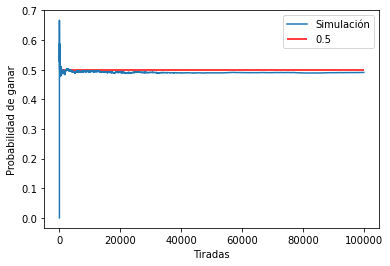

In [8]:
plt.plot(np.arange(1,n+1),prob_acumulado, label = "Simulación")
plt.hlines(0.5, 0, n, 'r', label = "0.5")
plt.xlabel("Tiradas")
plt.ylabel("Probabilidad de ganar")
plt.legend()
plt.show()

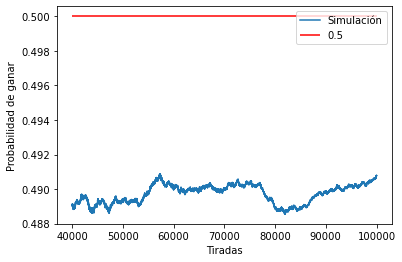

In [9]:
plt.plot(np.arange(1,n+1)[40000:],prob_acumulado[40000:], label = "Simulación")
plt.hlines(0.5, 40000, n, 'r', label = "0.5")
plt.xlabel("Tiradas")
plt.ylabel("Probabilidad de ganar")
plt.legend()
plt.show()